In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 이거 csv 경로 주의해라!! 왜 데이터셋에 있는데 안나와요 하지말고

df = pd.read_csv('01_BasicModel/dataset/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test , y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))  # 은닉층1
model.add(Dense(8, activation='relu'))                # 은닉층2
model.add(Dense(1, activation='sigmoid'))             # 출력층
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [8]:
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50,
)

l_accuracy: 0.6466
Epoch 61/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.7065 - val_loss: 0.7001 - val_accuracy: 0.6207
Epoch 62/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.7152 - val_loss: 0.6937 - val_accuracy: 0.6207
Epoch 63/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7152 - val_loss: 0.6915 - val_accuracy: 0.6293
Epoch 64/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6045 - accuracy: 0.7087 - val_loss: 0.6930 - val_accuracy: 0.6293
Epoch 65/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6035 - accuracy: 0.7087 - val_loss: 0.6776 - val_accuracy: 0.6379
Epoch 66/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.7022 - val_loss: 0.7017 - val_accuracy: 0.6466
Epoch 67/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.7109 - val_loss: 0.6737 - val_accu

In [10]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7448
정확도: 0.7448


In [19]:
model2 = Sequential()
model2.add(Dense(30, input_shape=(8,), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [20]:

model2.compile(
    optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
)

In [21]:
history = model2.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=1
)

l_accuracy: 0.6466
Epoch 61/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6870 - val_loss: 0.7710 - val_accuracy: 0.5776
Epoch 62/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7043 - val_loss: 0.9951 - val_accuracy: 0.5172
Epoch 63/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6630 - val_loss: 0.7528 - val_accuracy: 0.6121
Epoch 64/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.7174 - val_loss: 1.2165 - val_accuracy: 0.5948
Epoch 65/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6848 - val_loss: 0.7379 - val_accuracy: 0.6207
Epoch 66/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.7065 - val_loss: 0.8299 - val_accuracy: 0.5948
Epoch 67/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7239 - val_loss: 0.6870 - val_accu

In [24]:

model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 1.0157 - accuracy: 0.6771


[1.0156890153884888, 0.6770833134651184]

In [25]:
model3 = Sequential()
model3.add(Dense(24, input_shape=(8,), activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [26]:
model3.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [27]:
history3 = model3.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.4138
Epoch 2/200
10/10 - 0s - loss: 6.6367 - accuracy: 0.3348 - val_loss: 3.7411 - val_accuracy: 0.4224
Epoch 3/200
10/10 - 0s - loss: 3.2617 - accuracy: 0.3457 - val_loss: 1.6477 - val_accuracy: 0.4224
Epoch 4/200
10/10 - 0s - loss: 1.5858 - accuracy: 0.4087 - val_loss: 1.1279 - val_accuracy: 0.4569
Epoch 5/200
10/10 - 0s - loss: 1.0471 - accuracy: 0.5435 - val_loss: 0.9885 - val_accuracy: 0.5603
Epoch 6/200
10/10 - 0s - loss: 0.8512 - accuracy: 0.6348 - val_loss: 0.7958 - val_accuracy: 0.5345
Epoch 7/200
10/10 - 0s - loss: 0.7630 - accuracy: 0.6152 - val_loss: 0.7620 - val_accuracy: 0.5259
Epoch 8/200
10/10 - 0s - loss: 0.7297 - accuracy: 0.6174 - val_loss: 0.7272 - val_accuracy: 0.5690
Epoch 9/200
10/10 - 0s - loss: 0.7092 - accuracy: 0.6217 - val_loss: 0.7099 - val_accuracy: 0.5948
Epoch 10/200
10/10 - 0s - loss: 0.6967 - accuracy: 0.6457 - val_loss: 0.7150 - val_accuracy: 0.5776
Epoch 11/200
10/10 - 0s - loss: 0.6894 - accuracy: 0.6652 - val_loss: 0.7322 - val_accuracy: 0.5948
E

In [28]:
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7448


[0.5562655329704285, 0.7447916865348816]

In [29]:
# MinMax Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, 
    stratify=df.iloc[:,-1].values, random_state=seed
)

In [31]:
model4 = Sequential()
model4.add(Dense(12, input_dim=8, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [32]:
model4.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [33]:
history4 = model4.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.6034
Epoch 2/200
10/10 - 0s - loss: 0.6799 - accuracy: 0.6522 - val_loss: 0.6820 - val_accuracy: 0.5862
Epoch 3/200
10/10 - 0s - loss: 0.6691 - accuracy: 0.6696 - val_loss: 0.6806 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6620 - accuracy: 0.6696 - val_loss: 0.6809 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6554 - accuracy: 0.6674 - val_loss: 0.6821 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6523 - accuracy: 0.6674 - val_loss: 0.6832 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6493 - accuracy: 0.6674 - val_loss: 0.6832 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6479 - accuracy: 0.6674 - val_loss: 0.6842 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6456 - accuracy: 0.6674 - val_loss: 0.6840 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6440 - accuracy: 0.6674 - val_loss: 0.6840 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6428 - accuracy: 0.6674 - val_loss: 0.6862 - val_accuracy: 0.5862
E

In [34]:

model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7812


[0.4545283317565918, 0.78125]

In [35]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:

y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

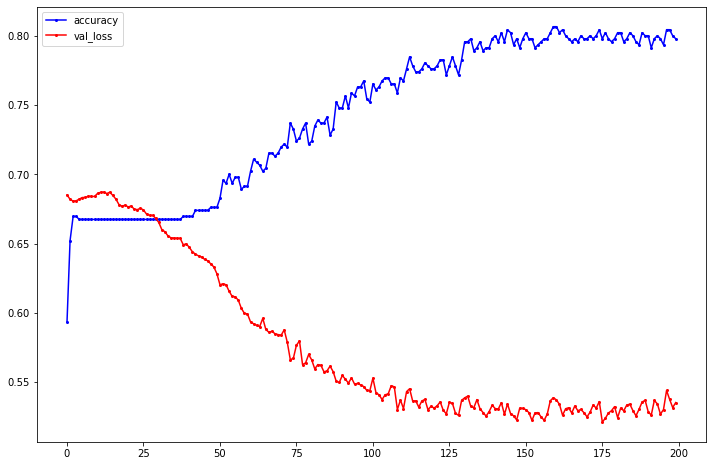

In [37]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()